# Extracción de veredas

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
from pyvis.network import Network
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('GSMI 2023.xlsx')

# Aseguramos que las columnas sean strings
df['DEPARTAMENTO_ORIGEN'] = df['DEPARTAMENTO_ORIGEN'].astype(str)
df['MUNICIPIO_ORIGEN'] = df['MUNICIPIO_ORIGEN'].astype(str)
df['VEREDA_ORIGEN'] = df['VEREDA_ORIGEN'].astype(str)

df['DEPARTAMENTO_DESTINO'] = df['DEPARTAMENTO_DESTINO'].astype(str)
df['MUNICIPIO_DESTINO'] = df['MUNICIPIO_DESTINO'].astype(str)
df['VEREDA_DESTINO'] = df['VEREDA_DESTINO'].astype(str)

# A nivel veredal

In [47]:
# Filtrar los departamentos de origen de interés (por ejemplo, 'GUAVIARE' y municipio 'MIRAFLORES')
Departamentos_de_analisis=['GUAVIARE']
df_amazonas = df[df['DEPARTAMENTO_ORIGEN'].isin(Departamentos_de_analisis)]
df_amazonas = df_amazonas.copy()

In [ ]:
# Crear los nodos combinando las columnas para que cada ubicación sea única usando .loc
df_amazonas.loc[:, 'Nodo_Origen'] = (
    df_amazonas['DEPARTAMENTO_ORIGEN'] + " - " +
    df_amazonas['MUNICIPIO_ORIGEN'] + " - " +
    df_amazonas['VEREDA_ORIGEN']
)
df_amazonas.loc[:, 'Nodo_Destino'] = (
    df_amazonas['DEPARTAMENTO_DESTINO'] + " - " +
    df_amazonas['MUNICIPIO_DESTINO'] + " - " +
    df_amazonas['VEREDA_DESTINO']
)

# Crear el grafo dirigido a partir del DataFrame
G = nx.from_pandas_edgelist(
    df_amazonas,
    source='Nodo_Origen',
    target='Nodo_Destino',
    create_using=nx.DiGraph()
)

# Generar el grafo interactivo usando PyVis, especificando cdn_resources='remote'
nt = Network(height="750px", width="100%", directed=True, notebook=True, cdn_resources='remote')
nt.from_nx(G)

# Ajustar el tamaño de los nodos según la cantidad de flechas salientes (out-degree)
for node in nt.nodes:
    nodo_id = node["id"]
    out_deg = G.out_degree(nodo_id)
    node["value"] = out_deg                # Escala el tamaño del nodo según out-degree
    node["title"] = f"Out-degree: {out_deg}" # Información en el tooltip
    node["label"] = nodo_id                # Mostrar la ubicación como etiqueta

# Configurar opciones interactivas para resaltar nodos y aristas relacionados,
# y hacer las líneas más gruesas al seleccionar
nt.set_options("""
{
  "nodes": {
    "color": {
      "highlight": {
        "border": "red",
        "background": "lightblue"
      }
    },
    "font": {
      "size": 14,
      "face": "arial"
    }
  },
  "edges": {
    "color": {
      "highlight": "orange"
    },
    "selectionWidth": 6,
    "hoverWidth": 6
  },
  "interaction": {
    "hover": true,
    "selectConnectedEdges": true,
    "multiselect": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -8000,
      "springLength": 250,
      "springConstant": 0.001,
      "damping": 0.09,
      "avoidOverlap": 0
    }
  }
}
""")

# Generar y guardar el grafo interactivo
nt.show("G_De_salida.html")


In [ ]:
# Creamos una copia para evitar warnings:
df_amazonas = df.copy()

# Crear nodos combinando las columnas para que cada ubicación sea única usando .loc
df_amazonas.loc[:, 'Nodo_Origen'] = (
    df_amazonas['DEPARTAMENTO_ORIGEN'] + " - " +
    df_amazonas['MUNICIPIO_ORIGEN'] + " - " +
    df_amazonas['VEREDA_ORIGEN']
)
df_amazonas.loc[:, 'Nodo_Destino'] = (
    df_amazonas['DEPARTAMENTO_DESTINO'] + " - " +
    df_amazonas['MUNICIPIO_DESTINO'] + " - " +
    df_amazonas['VEREDA_DESTINO']
)

# Crear el grafo dirigido a partir del DataFrame
G = nx.from_pandas_edgelist(
    df_amazonas,
    source='Nodo_Origen',
    target='Nodo_Destino',
    create_using=nx.DiGraph()
)

# Generar el grafo interactivo usando PyVis, especificando cdn_resources='remote'
nt = Network(height="750px", width="100%", directed=True, notebook=True, cdn_resources='remote')
nt.from_nx(G)

# Ajustar el tamaño de los nodos según la cantidad de flechas salientes (out-degree)
for node in nt.nodes:
    nodo_id = node["id"]
    out_deg = G.out_degree(nodo_id)
    node["value"] = out_deg                # Escala el tamaño según out-degree
    node["title"] = f"Out-degree: {out_deg}" # Se muestra en el tooltip
    node["label"] = nodo_id                # Se muestra la ubicación

# Configurar opciones interactivas para resaltar nodos y aristas relacionados,
# y hacer las líneas más gruesas al seleccionar
nt.set_options("""
{
  "nodes": {
    "color": {
      "highlight": {
        "border": "red",
        "background": "lightblue"
      }
    },
    "font": {
      "size": 14,
      "face": "arial"
    }
  },
  "edges": {
    "color": {
      "highlight": "orange"
    },
    "selectionWidth": 6,
    "hoverWidth": 6
  },
  "interaction": {
    "hover": true,
    "selectConnectedEdges": true,
    "multiselect": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -8000,
      "springLength": 250,
      "springConstant": 0.001,
      "damping": 0.09,
      "avoidOverlap": 0
    }
  }
}
""")

# Generar el HTML
html_str = nt.generate_html()

# Ahora, inyectamos un bloque de HTML/JavaScript que agrega controles de filtro.
custom_controls = """
<div style="margin: 10px;">
  <label for="deptSelect">Departamento:</label>
  <select id="deptSelect">
    <option value="All">All</option>
    <option value="GUAVIARE">GUAVIARE</option>
    <!-- Agrega más opciones según tus datos -->
  </select>

  <label for="muniSelect">Municipio:</label>
  <select id="muniSelect">
    <option value="All">All</option>
    <option value="SAN JOSÉ DEL GUAVIARE">SAN JOSÉ DEL GUAVIARE</option>
    <!-- Agrega más opciones según tus datos -->
  </select>

  <label for="veredaSelect">Vereda:</label>
  <select id="veredaSelect">
    <option value="All">All</option>
    <!-- Aquí puedes agregar opciones de veredas o incluso generarlas dinámicamente -->
  </select>

  <button onclick="filterNodes()">Filtrar</button>
</div>

<script>
// Función que recorre los nodos y actualiza el color según el filtro seleccionado
function filterNodes() {
  var dept = document.getElementById("deptSelect").value;
  var muni = document.getElementById("muniSelect").value;
  var vereda = document.getElementById("veredaSelect").value;

  // Obtener los nodos actuales de la red
  var nodes = network.body.data.nodes.get();
  var updatedNodes = [];

  nodes.forEach(function(node) {
    // Suponiendo que el id tiene el formato "DEPARTAMENTO - MUNICIPIO - VEREDA"
    var parts = node.id.split(" - ");
    var nodeDept = parts[0].trim();
    var nodeMuni = parts[1] ? parts[1].trim() : "";
    var nodeVereda = parts[2] ? parts[2].trim() : "";

    // Verifica si cumple con los filtros (si se selecciona "All", se acepta cualquier valor)
    var matchDept = (dept === "All" || dept === nodeDept);
    var matchMuni = (muni === "All" || muni === nodeMuni);
    var matchVereda = (vereda === "All" || vereda === nodeVereda);

    // Si el nodo cumple con los filtros, se resalta; de lo contrario se atenúa.
    if (matchDept && matchMuni && matchVereda) {
      node.color = {background: "lightblue", border: "red"};
    } else {
      node.color = {background: "grey", border: "grey"};
    }
    updatedNodes.push(node);
  });
  // Actualiza los nodos en la red
  network.body.data.nodes.update(updatedNodes);
}
</script>
"""

# Insertar los controles justo antes del cierre </body>
html_str = html_str.replace("</body>", custom_controls + "\n</body>")

# Guardar el HTML final
with open("G_De_salida.html", "w", encoding="utf-8") as f:
    f.write(html_str)

El grafo interactivo con filtros se ha guardado en 'G_De_salida.html'.


# A nivel municipal

In [34]:
# Filtrar los departamentos y municipios de interés y crear una copia explícita
Departamentos_de_analisis = ['GUAVIARE']
df_amazonas = df[df['DEPARTAMENTO_ORIGEN'].isin(Departamentos_de_analisis)].copy()

In [ ]:
# Crear nodos combinando las columnas para que cada ubicación sea única
df_amazonas['Nodo_Origen'] = df_amazonas['DEPARTAMENTO_ORIGEN'] + " - " + df_amazonas['MUNICIPIO_ORIGEN']
df_amazonas['Nodo_Destino'] = df_amazonas['DEPARTAMENTO_DESTINO'] + " - " + df_amazonas['MUNICIPIO_DESTINO']

# Crear el grafo dirigido
G = nx.from_pandas_edgelist(
    df_amazonas,
    source='Nodo_Origen',
    target='Nodo_Destino',
    create_using=nx.DiGraph()
)

# Generar el grafo interactivo usando PyVis (especificamos cdn_resources='remote' si es necesario)
nt = Network(height="750px", width="100%", directed=True, notebook=True, cdn_resources='remote')
nt.from_nx(G)

# Ajustar el tamaño de los nodos según la cantidad de flechas entrantes (in-degree)
for node in nt.nodes:
    nodo_id = node["id"]
    in_deg = G.in_degree(nodo_id)
    node["value"] = in_deg                # Escala el tamaño del nodo según in-degree
    node["title"] = f"In-degree: {in_deg}"  # Información en el tooltip
    node["label"] = nodo_id                # Mostrar la ubicación como etiqueta

# Configurar opciones interactivas para resaltar nodos y aristas relacionados,
# y hacer las líneas más gruesas al seleccionar
nt.set_options("""
{
  "nodes": {
    "color": {
      "highlight": {
        "border": "red",
        "background": "lightblue"
      }
    },
    "font": {
      "size": 14,
      "face": "arial"
    }
  },
  "edges": {
    "color": {
      "highlight": "orange"
    },
    "selectionWidth": 6,
    "hoverWidth": 6
  },
  "interaction": {
    "hover": true,
    "selectConnectedEdges": true,
    "multiselect": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -8000,
      "springLength": 250,
      "springConstant": 0.001,
      "damping": 0.09,
      "avoidOverlap": 0
    }
  }
}
""")

# Generar y guardar el grafo interactivo
nt.show("G_municipal_de entrada.html")

In [ ]:
# Crear nodos combinando las columnas para que cada ubicación sea única
df_amazonas['Nodo_Origen'] = df_amazonas['DEPARTAMENTO_ORIGEN'] + " - " + df_amazonas['MUNICIPIO_ORIGEN']
df_amazonas['Nodo_Destino'] = df_amazonas['DEPARTAMENTO_DESTINO'] + " - " + df_amazonas['MUNICIPIO_DESTINO']

# Crear el grafo dirigido
G = nx.from_pandas_edgelist(
    df_amazonas,
    source='Nodo_Origen',
    target='Nodo_Destino',
    create_using=nx.DiGraph()
)

# Generar el grafo interactivo usando PyVis (especificamos cdn_resources='remote' si es necesario)
nt = Network(height="750px", width="100%", directed=True, notebook=True, cdn_resources='remote')
nt.from_nx(G)

# Ajustar el tamaño de los nodos según la cantidad de flechas entrantes (in-degree)
for node in nt.nodes:
    nodo_id = node["id"]
    in_deg = G.out_degree(nodo_id)
    node["value"] = in_deg                # Escala el tamaño del nodo según in-degree
    node["title"] = f"In-degree: {in_deg}"  # Información en el tooltip
    node["label"] = nodo_id                # Mostrar la ubicación como etiqueta

# Configurar opciones interactivas para resaltar nodos y aristas relacionados,
# y hacer las líneas más gruesas al seleccionar
nt.set_options("""
{
  "nodes": {
    "color": {
      "highlight": {
        "border": "red",
        "background": "lightblue"
      }
    },
    "font": {
      "size": 14,
      "face": "arial"
    }
  },
  "edges": {
    "color": {
      "highlight": "orange"
    },
    "selectionWidth": 6,
    "hoverWidth": 6
  },
  "interaction": {
    "hover": true,
    "selectConnectedEdges": true,
    "multiselect": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -8000,
      "springLength": 250,
      "springConstant": 0.001,
      "damping": 0.09,
      "avoidOverlap": 0
    }
  }
}
""")

# Generar y guardar el grafo interactivo
nt.show("G_municipal_de salida.html")

# Cantidad de apariciones de rutas tipo A $\to$ B

C:\Users\jegonzalezb.PROCURADURIA\AppData\Local\Temp\ipykernel_20456\3196183146.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


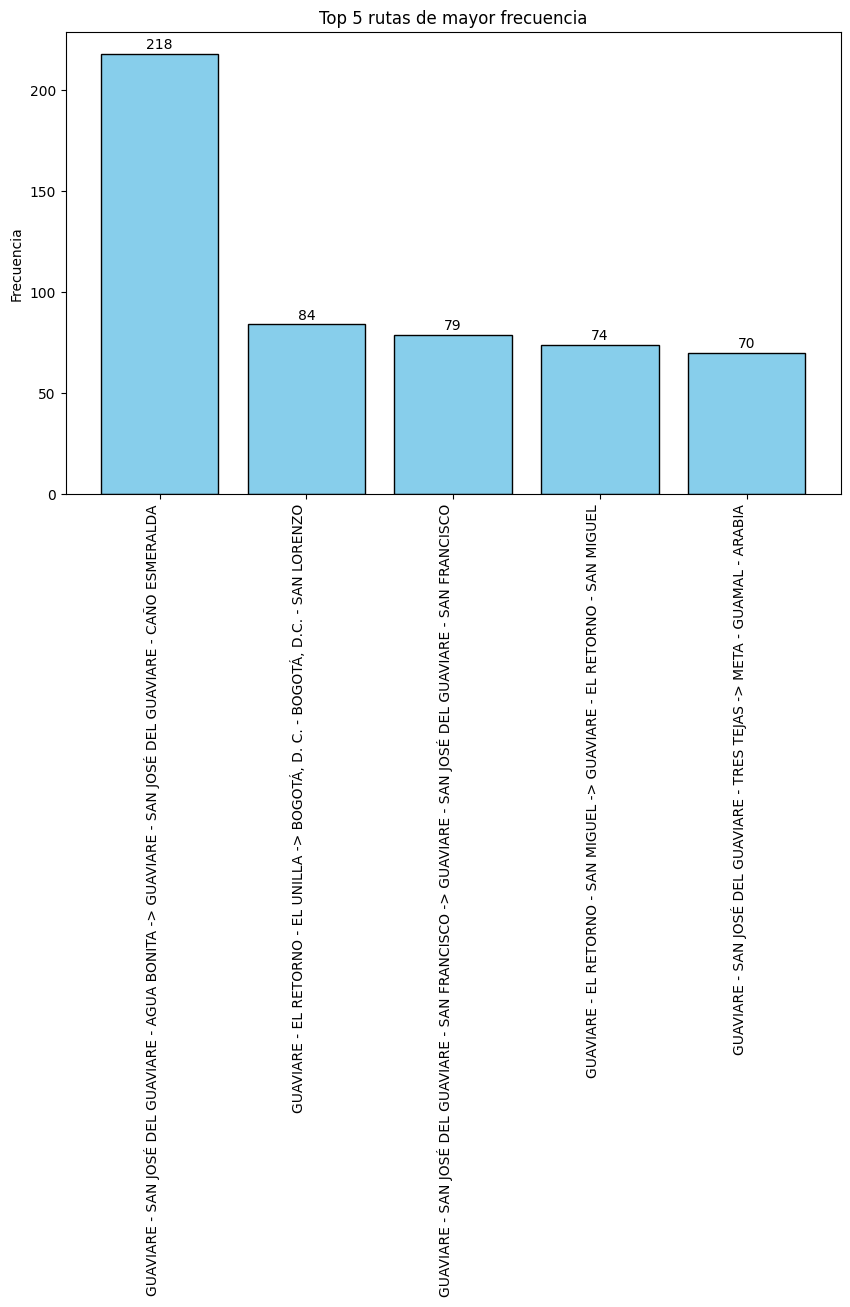

In [61]:
# Filtrar los departamentos y municipios de interés y crear una copia explícita
Departamentos_de_analisis = ['GUAVIARE']
df_amazonas = df[df['DEPARTAMENTO_ORIGEN'].isin(Departamentos_de_analisis)].copy()

# Crear columnas "origen" y "destino" concatenando Departamento, Municipio y Vereda
df_amazonas['origen'] = df_amazonas['DEPARTAMENTO_ORIGEN'] + " - " + df_amazonas['MUNICIPIO_ORIGEN'] + " - " + df_amazonas['VEREDA_ORIGEN']
df_amazonas['destino'] = df_amazonas['DEPARTAMENTO_DESTINO'] + " - " + df_amazonas['MUNICIPIO_DESTINO'] + " - " + df_amazonas['VEREDA_DESTINO']

# Agrupar por 'origen' y 'destino' y contar la cantidad de registros en cada grupo
frecuencias = df_amazonas.groupby(['origen', 'destino']).size().reset_index(name='cantidad_aparicion')
frecuencias = frecuencias.sort_values('cantidad_aparicion', ascending=False)

# Crear una nueva columna que combine origen y destino en formato "origen -> destino"
frecuencias['ruta'] = frecuencias['origen'] + " -> " + frecuencias['destino']

# Ordenar de mayor a menor frecuencia y seleccionar las 5 rutas con mayor frecuencia
top5 = frecuencias.sort_values('cantidad_aparicion', ascending=False).head(5)

# Crear un gráfico de barras para las 5 rutas
plt.figure(figsize=(10,6))
bars = plt.bar(range(len(top5)), top5['cantidad_aparicion'], color='skyblue', edgecolor='black')

# Usar las rutas como etiquetas en el eje x
plt.xticks(range(len(top5)), top5['ruta'], rotation=90, ha='right')
plt.ylabel('Frecuencia')
plt.title('Top 5 rutas de mayor frecuencia')

# Anotar cada barra con el valor de frecuencia
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, str(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()